In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np  
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import artist file 
file = "Resources/artistDf.csv"
artists=pd.read_csv(file)
artists.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


In [3]:
#import RIAA certifications file
file_2="Resources/riaaAlbumCerts_1999-2019.csv"
riaa=pd.read_csv(file_2)
riaa.head()

,Unnamed: 0,Album,Artist,Status,Label
0,0,GREATEST HITS,MARIAH CAREY,2x Multi-Platinum,LEGACY
1,1,THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
2,2,VIEWS,DRAKE,6x Multi-Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
3,3,MAJOR KEY,DJ KHALED,1x Platinum,WE THE BEST / EPIC
4,4,THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES


In [4]:
# Top 5 artists by followers 
#show only artist and followers column 
followers=artists[["Artist","Followers"]]
followers

,Artist,Followers
0,Ed Sheeran,52698756
1,Justin Bieber,30711450
2,Jonas Brothers,3069527
3,Drake,41420478
4,Chris Brown,9676862
...,...,...
1030,Dwight Yoakam,284597
1031,Jordan Knight,47229
1032,Lila McCann,42444
1033,Everlast,200550


In [5]:
#sort the followers column from greatest to smallest 
followers=followers.sort_values(["Followers"],ascending=False)
followers

,Artist,Followers
0,Ed Sheeran,52698756
3,Drake,41420478
113,Rihanna,34436700
1,Justin Bieber,30711450
54,Eminem,30220119
...,...,...
888,Toya,2425
652,Jeannie Ortega,1442
972,Eric Heatherly,1093
1029,Terry Dexter,790


In [6]:
#display top 5 artists by followers and reset index
followers=followers.head()
followers.reset_index(drop=True,inplace=True)
followers=followers.set_index(["Artist"])
followers

,Followers
Artist,
Ed Sheeran,52698756
Drake,41420478
Rihanna,34436700
Justin Bieber,30711450
Eminem,30220119


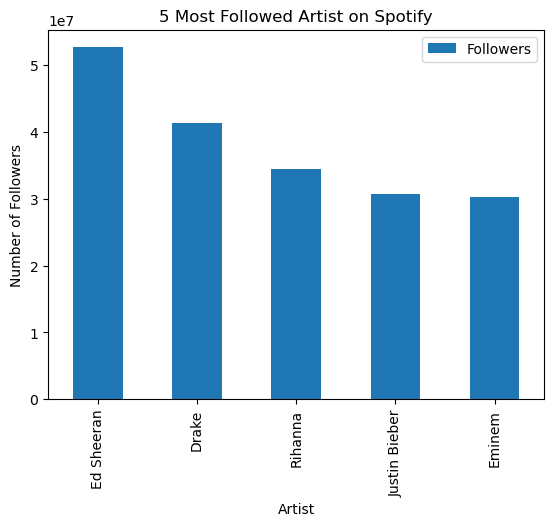

In [7]:
#create bar chart
followers.plot(kind="bar",title="5 Most Followed Artist on Spotify", xlabel="Artist", ylabel="Number of Followers" )
plt.show()

In [8]:
# Which artist has released the most albums 
#look only at the artist and NumAlbum colums 
most_album=artists[["Artist","NumAlbums"]]
most_album

,Artist,NumAlbums
0,Ed Sheeran,8
1,Justin Bieber,10
2,Jonas Brothers,10
3,Drake,11
4,Chris Brown,6
...,...,...
1030,Dwight Yoakam,25
1031,Jordan Knight,4
1032,Lila McCann,4
1033,Everlast,11


In [9]:
#sort the dataframe by Number of albums from greatest to least 
most_album=most_album.sort_values(["NumAlbums"],ascending=False)
most_album

,Artist,NumAlbums
25,Gucci Mane,132
682,Willie Nelson,112
245,Cash Cash,91
861,Oakenfold,90
67,Elvis Presley,75
...,...,...
680,The Notorious B.I.G.,3
356,Steve Holy,3
955,Changing Faces,3
812,Fefe Dobson,3


In [10]:
#reset the index
most_album.reset_index(drop=True,inplace=True)
most_album

,Artist,NumAlbums
0,Gucci Mane,132
1,Willie Nelson,112
2,Cash Cash,91
3,Oakenfold,90
4,Elvis Presley,75
...,...,...
1030,The Notorious B.I.G.,3
1031,Steve Holy,3
1032,Changing Faces,3
1033,Fefe Dobson,3


In [11]:
#display the artist with the most albums 
name_most_album=most_album.iloc[[0]]
name_most_album

,Artist,NumAlbums
0,Gucci Mane,132


In [12]:
#which artist relseased the first album
year=artists[["Artist","YearFirstAlbum"]]
year

,Artist,YearFirstAlbum
0,Ed Sheeran,2011
1,Justin Bieber,2009
2,Jonas Brothers,2006
3,Drake,2010
4,Chris Brown,2005
...,...,...
1030,Dwight Yoakam,1985
1031,Jordan Knight,1999
1032,Lila McCann,1997
1033,Everlast,1990


In [13]:
#sort by eariest year release 
year=year.sort_values(["YearFirstAlbum"])
year

,Artist,YearFirstAlbum
63,Gene Autry,1929
66,Bing Crosby,1932
71,Frank Sinatra,1946
58,Burl Ives,1949
361,Tony Bennett,1952
...,...,...
279,Q-Tip,2011
43,Scotty McCreery,2011
202,Action Bronson,2011
214,Big,2011


In [14]:
#reset index
year.reset_index(drop=True, inplace=True)
year

,Artist,YearFirstAlbum
0,Gene Autry,1929
1,Bing Crosby,1932
2,Frank Sinatra,1946
3,Burl Ives,1949
4,Tony Bennett,1952
...,...,...
1030,Q-Tip,2011
1031,Scotty McCreery,2011
1032,Action Bronson,2011
1033,Big,2011


In [15]:
#distplay the artist 
year_dropped=year.iloc[[0]]
year_dropped

,Artist,YearFirstAlbum
0,Gene Autry,1929


In [16]:
#plot the first 5 albums dropped by year
df=year.set_index(['Artist'])
df=df.head()
df

,YearFirstAlbum
Artist,
Gene Autry,1929
Bing Crosby,1932
Frank Sinatra,1946
Burl Ives,1949
Tony Bennett,1952


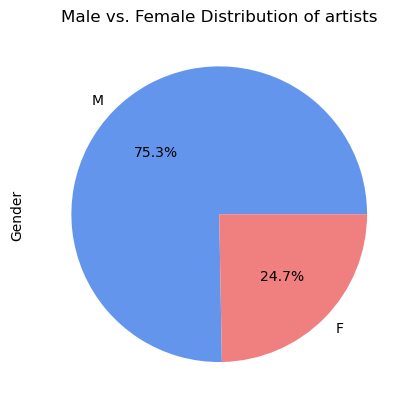

In [17]:
# what is the distribution of male v female artists? (pie chart)
artist_gender = artists['Gender'].value_counts()
colors = ['cornflowerblue','lightcoral']
artist_gender.plot(kind='pie', autopct="%.1f%%", colors=colors)
plt.title('Male vs. Female Distribution of artists')

plt.show()

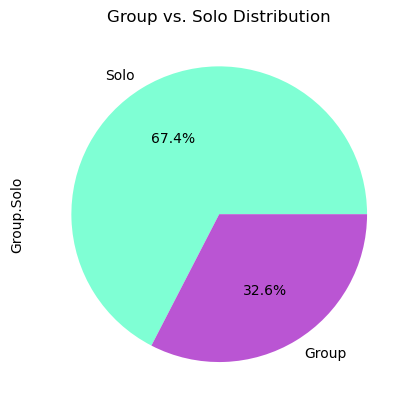

In [18]:
# distribution of group vs solo
group_solo = artists['Group.Solo'].value_counts()
colors = ['aquamarine','mediumorchid']
group_solo.plot(kind='pie', autopct="%.1f%%", colors=colors )
plt.title('Group vs. Solo Distribution')

plt.show()

In [19]:
#summary stats for number of albums
album_stats = artists.agg({'NumAlbums':['mean', 'median', 'var', 'std', 'sem']}).round(2)

album_stats

,NumAlbums
mean,11.33
median,8.00
var,135.48
std,11.64
sem,0.36


In [20]:
#summary stats for number of followers
followers_stats = artists.agg({'Followers':['mean', 'median', 'var', 'std', 'sem']}).astype(str)

followers_stats

,Followers
mean,1838602.457004831
median,571545.0
var,16082167089208.1
std,4010257.733513907
sem,124652.82062615405


In [21]:
# finding years since first album and albums per year

artists['Years Since First Album'] = 2019 - artists['YearFirstAlbum']
artists['Albums Per Year'] = artists['NumAlbums']/artists['Years Since First Album']
top_ten = artists.sort_values(by=['Albums Per Year'], ascending = False).head()
top_ten

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,Years Since First Album,Albums Per Year
25,25,Gucci Mane,2904919,"atl hip hop,dirty south rap,hip hop,pop,pop ra...",132,2005,M,Solo,14,9.428571
321,321,Waka Flocka Flame,1694515,"atl hip hop,dirty south rap,gangster rap,hip h...",45,2010,M,Solo,9,5.000000
861,861,Oakenfold,124743,"big beat,progressive trance,trance",90,2001,M,Solo,18,5.000000
15,15,Meek Mill,3591329,"hip hop,philly rap,pop,pop rap,rap,southern hi...",32,2011,M,Solo,8,4.000000
598,598,Young Buck,521562,"crunk,dirty south rap,gangster rap,hardcore hi...",57,2004,M,Solo,15,3.800000


In [22]:
# define a function that plots and shows linear regression
def linreg_eq (x_axis, y_axis, eq_coord, x_lab, y_lab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Get regression values
    regress_values = x_axis * slope + intercept
    #line eq to plot
    line_eq = "y = " + str(round(slope,4)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq, eq_coord, fontsize=15, color="red")
    #plot, format, show
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, 'r-')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.tight_layout()
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.035728159580289014


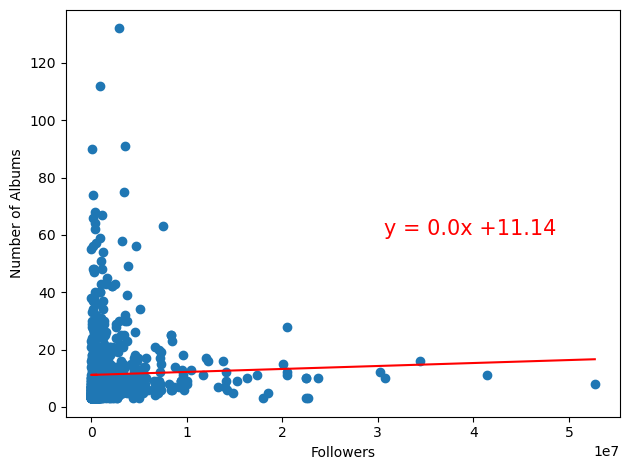

In [23]:
# displaying coorelation & linear regression between followers and number of albums
linreg_eq(artists['Followers'], artists['NumAlbums'],(30695247, 60), 'Followers', 'Number of Albums')

The r-value is: 0.5493816565963946


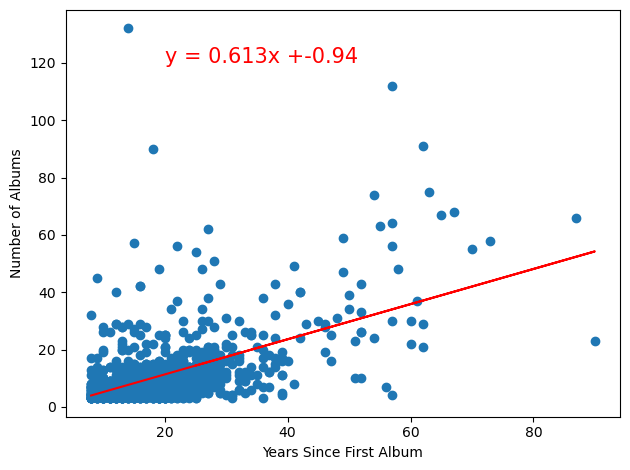

In [24]:
# # displaying coorelation & linear regression between years since first album and number of albums
linreg_eq(artists['Years Since First Album'], artists['NumAlbums'],(20, 120), 'Years Since First Album', 'Number of Albums')


In [25]:
#drop unwanted columns
riaa=riaa.drop(["Unnamed: 0"],axis=1)
riaa

,Album,Artist,Status,Label
0,GREATEST HITS,MARIAH CAREY,2x Multi-Platinum,LEGACY
1,THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
2,VIEWS,DRAKE,6x Multi-Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
3,MAJOR KEY,DJ KHALED,1x Platinum,WE THE BEST / EPIC
4,THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
...,...,...,...,...
1726,THE DISTANCE TO HERE,LIVE,1x Platinum,RADIOACTIVE
1727,I WANT IT ALL,WARREN G,Gold,RESTLESS/G-FUNK
1728,TO VENUS AND BACK,TORI AMOS,1x Platinum,ATLANTIC
1729,GUERILLA WARFARE,HOT BOYS,1x Platinum,CASH MONEY


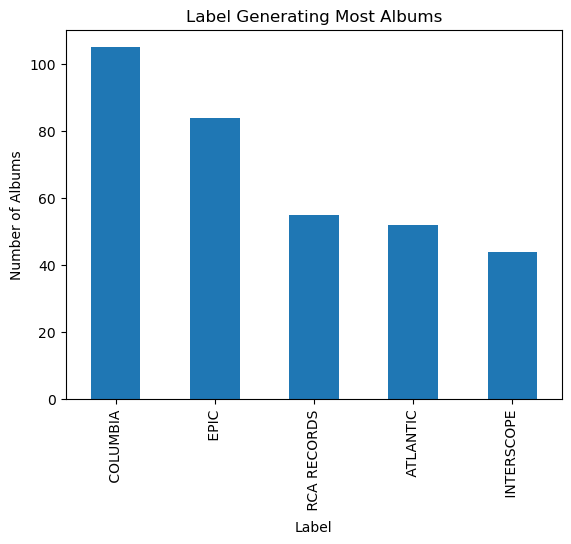

In [26]:
#Label with most albums released
label=riaa["Label"].value_counts()
bar=label.head()
bar.plot(kind="bar", title="Label Generating Most Albums", xlabel="Label", ylabel="Number of Albums")
plt.show()

In [27]:
# display most albums
bar

 COLUMBIA       105
 EPIC            84
 RCA RECORDS     55
 ATLANTIC        52
 INTERSCOPE      44
Name: Label, dtype: int64

In [28]:
# top ten artists that have albumns achieving diamond status
diamond=riaa[riaa["Status"].str.contains("Diamond", na=False)]
diamond_artists=diamond["Artist"].value_counts()
plt_d_artists = diamond_artists.head(10)
plt_d_artists

SHAKIRA           2
ADELE             2
EMINEM            2
JUANES            1
USHER             1
CREED             1
SHANIA TWAIN      1
BRITNEY SPEARS    1
NORAH JONES       1
OUTKAST           1
Name: Artist, dtype: int64

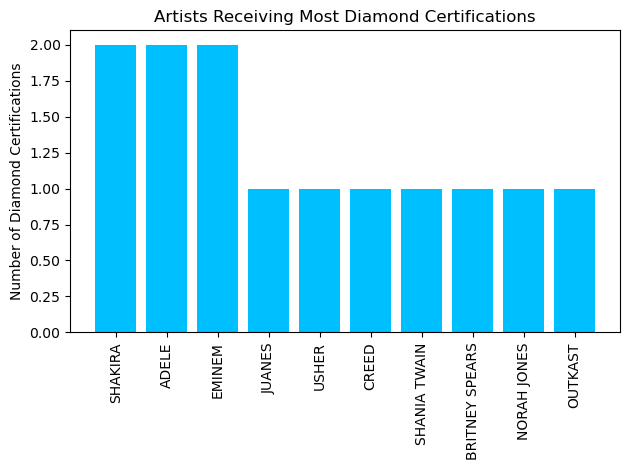

In [29]:
# bar chart for artists achieving diamond status
plt.bar(plt_d_artists.index.values, plt_d_artists.values, facecolor = 'deepskyblue')
plt.ylabel('Number of Diamond Certifications')
plt.xticks(rotation= 'vertical')
plt.title('Artists Receiving Most Diamond Certifications')
plt.tight_layout()
plt.show()

In [30]:
# which labels have achieved diamond status?
diamond_labels = diamond["Label"].value_counts()
plt_d_labels = diamond_labels.head(10)
plt_d_labels

 SONY LATIN                   3
 UNIVERSAL MUSIC LATINO       2
 AFTERMATH  /  INTERSCOPE     2
 SO SO DEF                    2
 BIG MACHINE RECORDS, INC.    1
 COLUMBIA/XL                  1
 WARNER BROS RECORDS          1
 ROADRUNNER                   1
 COLUMBIA                     1
 REPUBLIC RECORDS             1
Name: Label, dtype: int64

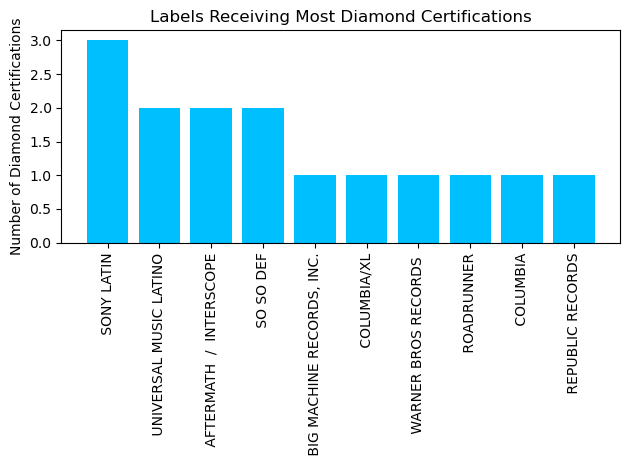

In [31]:
#bar chart for labels achieving diamond
plt.bar(plt_d_labels.index.values, plt_d_labels.values,  facecolor = 'deepskyblue')
plt.ylabel('Number of Diamond Certifications')
plt.xticks(rotation= 'vertical')
plt.title('Labels Receiving Most Diamond Certifications')
plt.tight_layout()
plt.show()

In [32]:
# creating gold status dataframe
index=riaa.set_index(["Album"])
index
test=index["Status"]=="Gold"
test
df=index.loc[test[:]]
df

,Artist,Status,Label
Album,,,
THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
BAPTIZED,DAUGHTRY,Gold,RCA
TREMAINE: THE ALBUM,TREY SONGZ,Gold,ATLANTIC RECORDS
GRAFFITI,CHRIS BROWN,Gold,RCA
...,...,...,...
MIDNITE VULTURES,BECK,Gold,GEFFEN
RAVE UN2 THE JOY FANTASTIC,PRINCE,Gold,ARISTA
NIGGA PLEASE,OL' DIRTY BASTARD,Gold,ELEKTRA


In [33]:
# finding unique artist names
df['Artist'].unique()

array(['MARIAH CAREY', 'MERCYME', 'DAUGHTRY', 'TREY SONGZ', 'CHRIS BROWN',
       'CAGE THE ELEPHANT', 'KEITH URBAN', 'KEVIN GATES', 'JOHN MAYER',
       'DJ KHALED', 'WIZ KHALIFA', 'EMPIRE OF THE SUN', 'JOSH TURNER',
       'ASHER ROTH', 'GOO GOO DOLLS', 'MAC MILLER', 'CHRISTINA PERRI',
       'QUEEN', 'LUKE BRYAN', 'LINKIN PARK', 'KID CUDI', 'MIGUEL',
       'SOLANGE', 'ELTON JOHN', 'KEANE', 'TWENTY ONE PILOTS', 'KESHA',
       'BRANTLEY GILBERT', 'YO GOTTI', 'SKILLET', 'RADIOHEAD',
       'CARRIE UNDERWOOD', 'SARA EVANS', 'EMINEM', 'KANYE WEST',
       'PORTUGAL. THE MAN', 'KENNY CHESNEY', 'JASON ALDEAN',
       'TALIB KWELI', 'CHRISTINA AGUILERA', 'SCHOOLBOY Q',
       'SILVERSUN PICKUPS', 'LIZ PHAIR', 'MEEK MILL', 'AVRIL LAVIGNE',
       'GUCCI MANE', 'ELVIS PRESLEY', 'JUSTIN TIMBERLAKE',
       'RODNEY ATKINS', 'PANIC! AT THE DISCO', 'SHINEDOWN',
       'BRITNEY SPEARS', 'TYLER THE CREATOR', 'NEW BOYZ',
       'WHITNEY HOUSTON', '10 YEARS', 'IDINA MENZEL', 'BIG SEAN',
       'FRE

In [34]:
# finding counts for artists
df['Artist'].value_counts()

ELVIS PRESLEY      10
MERCYME             7
LIL WAYNE           6
GEORGE STRAIT       6
JOSH GROBAN         5
                   ..
HINDER              1
ENYA                1
THE KILLERS         1
DAVID ARCHULETA     1
WARREN G            1
Name: Artist, Length: 473, dtype: int64

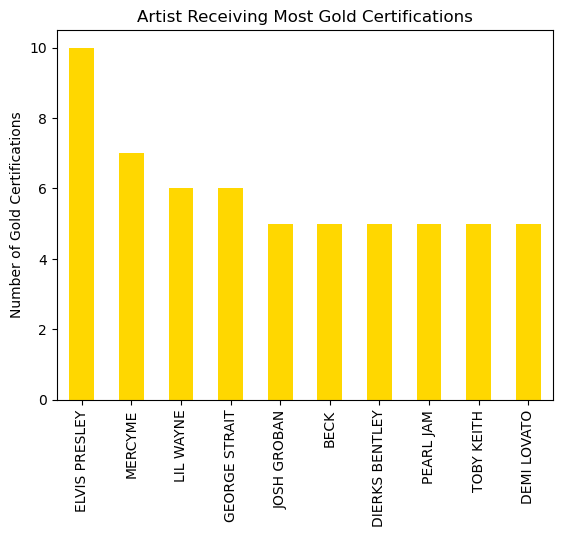

In [35]:
# display graph
fig, ax = plt.subplots()
df['Artist'].value_counts().head(10).plot(ax=ax, kind='bar', color='Gold', title="Artist Receiving Most Gold Certifications", ylabel="Number of Gold Certifications")
plt.show()

In [36]:
# re-indexing dataframe to artist
# df.set_index(["Artist"])

In [37]:
# finding unique labels
df['Label'].unique()

array([' COLUMBIA', ' FAIR TRADE SERVICES', ' RCA', ' ATLANTIC RECORDS',
       ' JIVE', ' CHRIS BROWN ENTERTAINMENT / RCA',
       ' CAPITOL RECORDS NASHVILLE',
       ' BREAD WINNERS ASSOCIATION / ATLANTIC RECORDS',
       ' WE THE BEST / EPIC', ' ASTRALWERKS', ' MCA NASHVILLE',
       ' MOTOWN RECORDS', ' WARNER BROS. RECORDS', ' ROSTRUM  ',
       ' WARNER BROS RECORDS ', ' HOLLYWOOD RECORDS', ' REPUBLIC RECORDS',
       ' BYSTORM/RCA', ' UNIVERSAL MUSIC ENTERPRISES',
       ' INTERSCOPE RECORDS', ' FUELED BY RAMEN', ' THE VALORY MUSIC CO',
       ' EPIC', ' XL RECORDINGS', ' RCA NASHVILLE',
       ' SHADY / AFTERMATH / INTERSCOPE',
       ' G.O.O.D MUSIC / DEF JAM RECORDINGS',
       ' BLUE CHAIR RECORDS / COLUMBIA NASHVILLE', ' BROKEN BOW RECORDS',
       ' RAWKUS', ' TOP DAWG ENTERTAINMENT / INTERSCOPE',
       ' DANGERBIRD RECORDS', ' CAPITOL RECORDS', ' ROSTRUM RECORDS',
       ' RCA RECORDS', ' EPIC RECORDS', ' SBME STRATEGIC MARKETING GROUP',
       ' BMG HERITAGE', ' RCA / 

In [38]:
# finding counts for labels
df['Label'].value_counts()

 COLUMBIA                                    51
 EPIC                                        40
 ATLANTIC                                    25
 GEFFEN                                      24
 RCA RECORDS                                 21
                                             ..
 HOMEGROWN / ATLANTIC RECORDS                 1
 MR. 305, DISTRIBUTED BY SONY MUSIC LATIN     1
 PPK                                          1
 COLUMBIA / NICKELODEON JV                    1
 RESTLESS/G-FUNK                              1
Name: Label, Length: 224, dtype: int64

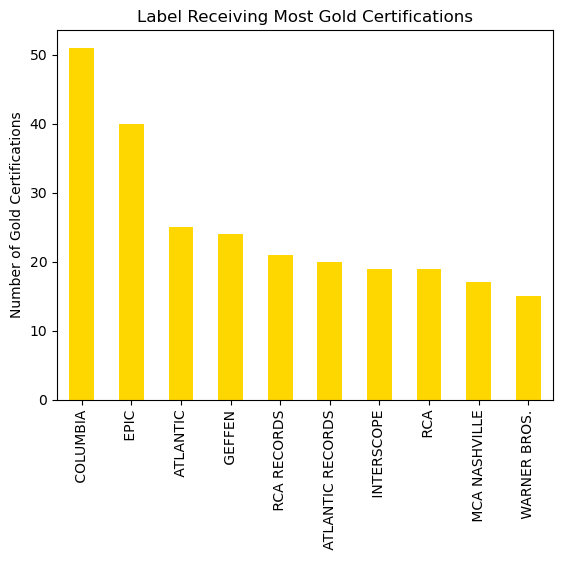

In [39]:
# display graph
fig, ax = plt.subplots()
df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', color='Gold', title="Label Receiving Most Gold Certifications", ylabel="Number of Gold Certifications")
plt.show()

In [40]:
# genres

# create genres dataframe
artists_genres_df = pd.read_csv("Resources/artistDf.csv")
artists_genres_df

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo
...,...,...,...,...,...,...,...,...
1030,1030,Dwight Yoakam,284597,"country,country rock,nashville sound,outlaw co...",25,1985,M,Solo
1031,1031,Jordan Knight,47229,NaN,4,1999,M,Solo
1032,1032,Lila McCann,42444,"contemporary country,country,country dawn",4,1997,F,Solo
1033,1033,Everlast,200550,rap rock,11,1990,M,Solo


In [41]:
# genres

# determine most common genres: break genres into string w/comma to split types and save to new column
artists_genres_df['Genres'] = artists_genres_df['Genres'].astype(str)
artists_genres_df['CommonTerms'] = artists_genres_df['Genres'].apply(lambda x: x.split(','))
artists_genres_df.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,CommonTerms
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,"[pop, uk pop]"
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,"[canadian pop, dance pop, pop, post-teen pop]"
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group,"[boy band, dance pop, pop, post-teen pop]"
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo,"[canadian hip hop, canadian pop, hip hop, pop ..."
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo,"[dance pop, pop, pop rap, r&b, rap]"


In [42]:
# genres

# loop through CommonTerms and count 

all_genres = []
for g in artists_genres_df['CommonTerms']:
    all_genres.extend(g)

genres_dict = dict(Counter(all_genres))

sorted_genres_dict = dict(sorted(genres_dict.items(), key=lambda item:item[1], reverse=True))
sorted_genres_dict

{'dance pop': 226,
 'pop rap': 209,
 'pop': 198,
 'rap': 166,
 'hip hop': 158,
 'pop rock': 147,
 'southern hip hop': 144,
 'r&b': 137,
 'urban contemporary': 134,
 'country': 129,
 'contemporary country': 120,
 'hip pop': 119,
 'post-grunge': 107,
 'country road': 103,
 'gangster rap': 103,
 'rock': 98,
 'trap music': 94,
 'neo mellow': 92,
 'neo soul': 90,
 'alternative metal': 79,
 'post-teen pop': 73,
 'dirty south rap': 67,
 'modern rock': 64,
 'nu metal': 62,
 'pop punk': 58,
 'new jack swing': 56,
 'modern country rock': 55,
 'alternative rock': 55,
 'hardcore hip hop': 47,
 'permanent wave': 46,
 'atl hip hop': 44,
 'folk-pop': 44,
 'quiet storm': 42,
 'country dawn': 39,
 'deep pop r&b': 34,
 'rap rock': 34,
 'europop': 33,
 'indie pop': 33,
 'latin': 29,
 'east coast hip hop': 28,
 'country rock': 27,
 'indie rock': 27,
 'acoustic pop': 26,
 'crunk': 26,
 'latin pop': 24,
 'mellow gold': 24,
 'tropical': 23,
 'new wave pop': 23,
 'soft rock': 23,
 'traditional country': 23,
 

In [43]:
print(len(sorted_genres_dict))

447


In [44]:
# creating dataframe for genres
genres_df = pd.DataFrame([sorted_genres_dict])
genres_df.iloc[:, :10] 

,dance pop,pop rap,pop,rap,hip hop,pop rock,southern hip hop,r&b,urban contemporary,country
0,226,209,198,166,158,147,144,137,134,129


In [45]:
# displaying top 10 genres
genres_df.head(10)

,dance pop,pop rap,pop,rap,hip hop,pop rock,southern hip hop,r&b,urban contemporary,country,...,delta blues,traditional blues,eau claire indie,smooth saxophone,hi-nrg,argentine rock,folklore argentino,nueva cancion,rock nacional,trova
0,226,209,198,166,158,147,144,137,134,129,...,1,1,1,1,1,1,1,1,1,1


In [46]:
# transposing dataframe
genres_df.T.head(20) 

,0
dance pop,226
pop rap,209
pop,198
rap,166
hip hop,158
pop rock,147
southern hip hop,144
r&b,137
urban contemporary,134
country,129


Text(0.5, 1.0, 'Top 10 Genres')

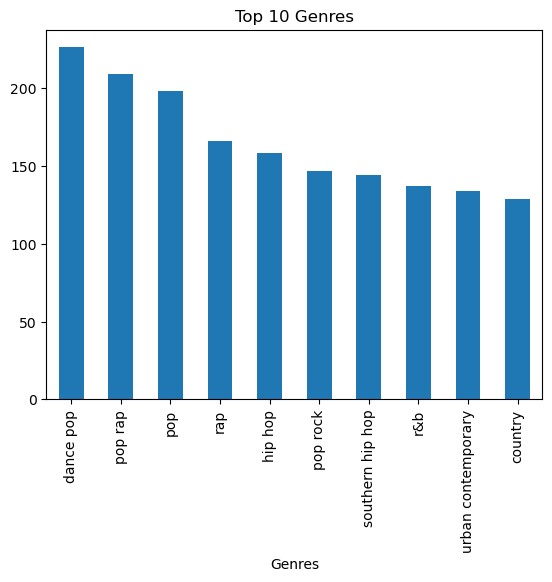

In [47]:
#display graph
genres_df = pd.DataFrame({
    "Genres": ["dance pop", "pop rap", "pop", "rap", "hip hop", "pop rock", "southern hip hop", "r&b", "urban contemporary", "country"],
    "Values": [226, 209, 198, 166, 158, 147, 144, 137, 134, 129]
})
                        
bar_plot = genres_df.plot.bar(x = 'Genres', y = 'Values', legend=None)
bar_plot.set_title("Top 10 Genres")

In [48]:
# certifications clustered bar chart - gold

# index=riaa.set_index(["Album"])
# index
# test=index["Status"]=="Gold"
# test
# gold_df=index.loc[test[:]]
# gold_df

In [49]:
# certifications clustered bar chart - gold

# gold_df['Label'].unique()

In [50]:
# certifications clustered bar chart - gold

# gold_df['Label'].value_counts()

In [51]:
# fig, ax = plt.subplots()
# gold_df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', title="Label Receiving Most Gold Certificiations", ylabel="Number of Gold Certifications")
# plt.show()

In [52]:
# certifications clustered bar chart - platinum

index=riaa.set_index(["Album"])
index
test = index["Status"].str.contains("Platinum", case=False)
test
platinum_df=index.loc[test[:]]
platinum_df

,Artist,Status,Label
Album,,,
GREATEST HITS,MARIAH CAREY,2x Multi-Platinum,LEGACY
VIEWS,DRAKE,6x Multi-Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
MAJOR KEY,DJ KHALED,1x Platinum,WE THE BEST / EPIC
DON'T SMILE AT ME,BILLIE EILISH,1x Platinum,DARKROOM / INTERSCOPE RECORDS
LOVER,TAYLOR SWIFT,1x Platinum,REPUBLIC RECORDS
...,...,...,...
UNDER THE INFLUENCE,ALAN JACKSON,1x Platinum,ARISTA NASHVILLE
THE DISTANCE TO HERE,LIVE,1x Platinum,RADIOACTIVE
TO VENUS AND BACK,TORI AMOS,1x Platinum,ATLANTIC


In [53]:
# certifications clustered bar chart - platinum

platinum_df['Label'].unique()

array([' LEGACY',
       ' REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG MONEY ENTERTAINMENT',
       ' WE THE BEST / EPIC', ' DARKROOM / INTERSCOPE RECORDS',
       ' REPUBLIC RECORDS',
       ' YOUNG MONEY / CASH MONEY / REPUBLIC RECORDS',
       ' DARKROOM / INTERSCOPE', ' RCA', ' RIGHT HAND MUSIC / RCA',
       ' SONY MUSIC LATIN', ' COLUMBIA', ' MMG / ATLANTIC RECORDS',
       ' ROC NATION / COLUMBIA', ' FUELED BY RAMEN',
       ' CAPITOL RECORDS NASHVILLE', ' EMI RECORDS NASHVILLE',
       ' SLIP N SLIDE  /  ATLANTIC', ' SONY LATIN', ' ATLANTIC RECORDS',
       ' DEF JAM RECORDINGS', ' EPIC',
       ' BREAD WINNERS ASSOCIATION / ATLANTIC RECORDS', ' INTERSCOPE',
       ' YOUNG MONEY RECORDS', ' HOMEGROWN / ATLANTIC RECORDS',
       ' QUALITY CONTROL MUSIC / MOTOWN RECORDS / CAPITOL RECORDS',
       ' RCA NASHVILLE', ' SHADY / AFTERMATH / INTERSCOPE',
       ' DREAMVILLE / ROC NATION', ' CHERRY TREE / INTERSCOPE',
       ' COLUMBIA NASHVILLE', ' GLASSNOTE RECORDS', ' RHINO', ' VOL

In [54]:
# certifications clustered bar chart - platinum

platinum_df['Label'].value_counts()

 COLUMBIA                       53
 EPIC                           44
 RCA RECORDS                    34
 ATLANTIC                       27
 WARNER BROS.                   25
                                ..
 COLUMBIA NASHVILLE / LEGACY     1
 COLUMBIA/LEGACY                 1
 RCA/LEGACY                      1
 REPUBLIC RECORDS / LAVA         1
 RADIOACTIVE                     1
Name: Label, Length: 220, dtype: int64

In [55]:
# fig, ax = plt.subplots()
# platinum_df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', title="Label Receiving Most Platinum Certificiations", ylabel="Number of Platinum Certifications")
# plt.show()

In [56]:
# certifications clustered bar chart - diamond

index=riaa.set_index(["Album"])
index
test = index["Status"].str.contains("Diamond", case=False)
test
diamond_df=index.loc[test[:]]
diamond_df

,Artist,Status,Label
Album,,,
MI SANGRE,JUANES,18x Diamond,UNIVERSAL MUSIC LATINO
VIDA,LUIS FONSI,22x Diamond,UNIVERSAL MUSIC LATINO
EL DORADO,SHAKIRA,10x Diamond,SONY LATIN
SALE EL SOL,SHAKIRA,10x Diamond,SONY LATIN
FENIX,NICKY JAM,11x Diamond,SONY LATIN
FEARLESS,TAYLOR SWIFT,10x Diamond,"BIG MACHINE RECORDS, INC."
25,ADELE,11x Diamond,COLUMBIA/XL
HYBRID THEORY,LINKIN PARK,11x Diamond,WARNER BROS RECORDS
ALL THE RIGHT REASONS,NICKELBACK,10x Diamond,ROADRUNNER


In [57]:
# certifications clustered bar chart - diamond

diamond_df['Label'].unique()

array([' UNIVERSAL MUSIC LATINO', ' SONY LATIN',
       ' BIG MACHINE RECORDS, INC.', ' COLUMBIA/XL',
       ' WARNER BROS RECORDS ', ' ROADRUNNER', ' COLUMBIA',
       ' REPUBLIC RECORDS', ' AFTERMATH  /  INTERSCOPE', ' SO SO DEF',
       ' BLUE NOTE', ' JIVE', ' MERCURY NASHVILLE', ' WIND-UP RECORDS',
       ' MONUMENT'], dtype=object)

In [58]:
# certifications clustered bar chart - diamond

diamond_df['Label'].value_counts()

 SONY LATIN                   3
 UNIVERSAL MUSIC LATINO       2
 AFTERMATH  /  INTERSCOPE     2
 SO SO DEF                    2
 BIG MACHINE RECORDS, INC.    1
 COLUMBIA/XL                  1
 WARNER BROS RECORDS          1
 ROADRUNNER                   1
 COLUMBIA                     1
 REPUBLIC RECORDS             1
 BLUE NOTE                    1
 JIVE                         1
 MERCURY NASHVILLE            1
 WIND-UP RECORDS              1
 MONUMENT                     1
Name: Label, dtype: int64

In [59]:
# fig, ax = plt.subplots()
# diamond_df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', title="Label Receiving Most Diamond Certificiations", ylabel="Number of Diamond Certifications")
# plt.show()

In [60]:
# concatenating gold, plat, dia df into single df with all certs
all_certs_df = pd.concat([df, platinum_df, diamond_df])
all_certs_df

,Artist,Status,Label
Album,,,
THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
BAPTIZED,DAUGHTRY,Gold,RCA
TREMAINE: THE ALBUM,TREY SONGZ,Gold,ATLANTIC RECORDS
GRAFFITI,CHRIS BROWN,Gold,RCA
...,...,...,...
COME AWAY WITH ME,NORAH JONES,10x Diamond,BLUE NOTE
OOPS!...I DID IT AGAIN,BRITNEY SPEARS,10x Diamond,JIVE
UP!,SHANIA TWAIN,11x Diamond,MERCURY NASHVILLE


In [61]:
# finding unique values for labels
all_certs_df['Label'].unique()

array([' COLUMBIA', ' FAIR TRADE SERVICES', ' RCA', ' ATLANTIC RECORDS',
       ' JIVE', ' CHRIS BROWN ENTERTAINMENT / RCA',
       ' CAPITOL RECORDS NASHVILLE',
       ' BREAD WINNERS ASSOCIATION / ATLANTIC RECORDS',
       ' WE THE BEST / EPIC', ' ASTRALWERKS', ' MCA NASHVILLE',
       ' MOTOWN RECORDS', ' WARNER BROS. RECORDS', ' ROSTRUM  ',
       ' WARNER BROS RECORDS ', ' HOLLYWOOD RECORDS', ' REPUBLIC RECORDS',
       ' BYSTORM/RCA', ' UNIVERSAL MUSIC ENTERPRISES',
       ' INTERSCOPE RECORDS', ' FUELED BY RAMEN', ' THE VALORY MUSIC CO',
       ' EPIC', ' XL RECORDINGS', ' RCA NASHVILLE',
       ' SHADY / AFTERMATH / INTERSCOPE',
       ' G.O.O.D MUSIC / DEF JAM RECORDINGS',
       ' BLUE CHAIR RECORDS / COLUMBIA NASHVILLE', ' BROKEN BOW RECORDS',
       ' RAWKUS', ' TOP DAWG ENTERTAINMENT / INTERSCOPE',
       ' DANGERBIRD RECORDS', ' CAPITOL RECORDS', ' ROSTRUM RECORDS',
       ' RCA RECORDS', ' EPIC RECORDS', ' SBME STRATEGIC MARKETING GROUP',
       ' BMG HERITAGE', ' RCA / 

In [62]:
# getting counts for labels
all_certs_df['Label'].value_counts()

 COLUMBIA            105
 EPIC                 84
 RCA RECORDS          55
 ATLANTIC             52
 INTERSCOPE           44
                    ... 
 NPG/UNIVERSAL         1
 JIVE/ZOMBA            1
 EPIC/DOMINO           1
 EVERFINE RECORDS      1
 MONUMENT              1
Name: Label, Length: 324, dtype: int64

In [63]:
# all_certs_df.value_counts()

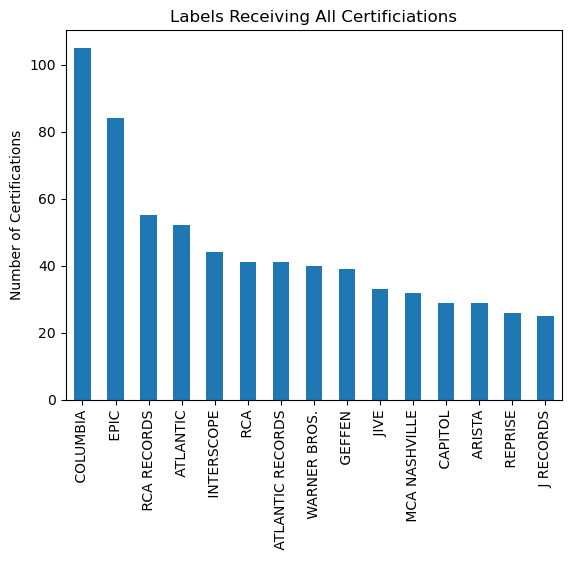

In [64]:
#display graph
fig, ax = plt.subplots()
all_certs_df['Label'].value_counts().head(15).plot(ax=ax, kind='bar', title="Labels Receiving All Certificiations", ylabel="Number of Certifications")
plt.show()

In [65]:
# gold_df

In [66]:
# unifying status
platinum_df["Status"]="Platinum"
platinum_df

,Artist,Status,Label
Album,,,
GREATEST HITS,MARIAH CAREY,Platinum,LEGACY
VIEWS,DRAKE,Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
MAJOR KEY,DJ KHALED,Platinum,WE THE BEST / EPIC
DON'T SMILE AT ME,BILLIE EILISH,Platinum,DARKROOM / INTERSCOPE RECORDS
LOVER,TAYLOR SWIFT,Platinum,REPUBLIC RECORDS
...,...,...,...
UNDER THE INFLUENCE,ALAN JACKSON,Platinum,ARISTA NASHVILLE
THE DISTANCE TO HERE,LIVE,Platinum,RADIOACTIVE
TO VENUS AND BACK,TORI AMOS,Platinum,ATLANTIC


In [67]:
# unifying status
diamond_df["Status"]="Diamond"
diamond_df

,Artist,Status,Label
Album,,,
MI SANGRE,JUANES,Diamond,UNIVERSAL MUSIC LATINO
VIDA,LUIS FONSI,Diamond,UNIVERSAL MUSIC LATINO
EL DORADO,SHAKIRA,Diamond,SONY LATIN
SALE EL SOL,SHAKIRA,Diamond,SONY LATIN
FENIX,NICKY JAM,Diamond,SONY LATIN
FEARLESS,TAYLOR SWIFT,Diamond,"BIG MACHINE RECORDS, INC."
25,ADELE,Diamond,COLUMBIA/XL
HYBRID THEORY,LINKIN PARK,Diamond,WARNER BROS RECORDS
ALL THE RIGHT REASONS,NICKELBACK,Diamond,ROADRUNNER


In [68]:
# ranaming status column
df.rename(columns = {'Status':'Status GOLD'}, inplace = True)
df

,Artist,Status GOLD,Label
Album,,,
THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
BAPTIZED,DAUGHTRY,Gold,RCA
TREMAINE: THE ALBUM,TREY SONGZ,Gold,ATLANTIC RECORDS
GRAFFITI,CHRIS BROWN,Gold,RCA
...,...,...,...
MIDNITE VULTURES,BECK,Gold,GEFFEN
RAVE UN2 THE JOY FANTASTIC,PRINCE,Gold,ARISTA
NIGGA PLEASE,OL' DIRTY BASTARD,Gold,ELEKTRA


In [69]:
# setting index to label
df.set_index(["Label"])

,Artist,Status GOLD
Label,,
COLUMBIA,MARIAH CAREY,Gold
FAIR TRADE SERVICES,MERCYME,Gold
RCA,DAUGHTRY,Gold
ATLANTIC RECORDS,TREY SONGZ,Gold
RCA,CHRIS BROWN,Gold
...,...,...
GEFFEN,BECK,Gold
ARISTA,PRINCE,Gold
ELEKTRA,OL' DIRTY BASTARD,Gold


In [70]:
# ranaming status column
platinum_df.rename(columns = {'Status':'Status PLAT'}, inplace = True)
platinum_df

,Artist,Status PLAT,Label
Album,,,
GREATEST HITS,MARIAH CAREY,Platinum,LEGACY
VIEWS,DRAKE,Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
MAJOR KEY,DJ KHALED,Platinum,WE THE BEST / EPIC
DON'T SMILE AT ME,BILLIE EILISH,Platinum,DARKROOM / INTERSCOPE RECORDS
LOVER,TAYLOR SWIFT,Platinum,REPUBLIC RECORDS
...,...,...,...
UNDER THE INFLUENCE,ALAN JACKSON,Platinum,ARISTA NASHVILLE
THE DISTANCE TO HERE,LIVE,Platinum,RADIOACTIVE
TO VENUS AND BACK,TORI AMOS,Platinum,ATLANTIC


In [71]:
# indexing to label
platinum_df.set_index(["Label"])

,Artist,Status PLAT
Label,,
LEGACY,MARIAH CAREY,Platinum
REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG MONEY ENTERTAINMENT,DRAKE,Platinum
WE THE BEST / EPIC,DJ KHALED,Platinum
DARKROOM / INTERSCOPE RECORDS,BILLIE EILISH,Platinum
REPUBLIC RECORDS,TAYLOR SWIFT,Platinum
...,...,...
ARISTA NASHVILLE,ALAN JACKSON,Platinum
RADIOACTIVE,LIVE,Platinum
ATLANTIC,TORI AMOS,Platinum


In [72]:
# renaming column
diamond_df.rename(columns = {'Status':'Status DIA'}, inplace = True)
diamond_df

,Artist,Status DIA,Label
Album,,,
MI SANGRE,JUANES,Diamond,UNIVERSAL MUSIC LATINO
VIDA,LUIS FONSI,Diamond,UNIVERSAL MUSIC LATINO
EL DORADO,SHAKIRA,Diamond,SONY LATIN
SALE EL SOL,SHAKIRA,Diamond,SONY LATIN
FENIX,NICKY JAM,Diamond,SONY LATIN
FEARLESS,TAYLOR SWIFT,Diamond,"BIG MACHINE RECORDS, INC."
25,ADELE,Diamond,COLUMBIA/XL
HYBRID THEORY,LINKIN PARK,Diamond,WARNER BROS RECORDS
ALL THE RIGHT REASONS,NICKELBACK,Diamond,ROADRUNNER


In [73]:
# indexing to label
diamond_df.set_index(["Label"])

,Artist,Status DIA
Label,,
UNIVERSAL MUSIC LATINO,JUANES,Diamond
UNIVERSAL MUSIC LATINO,LUIS FONSI,Diamond
SONY LATIN,SHAKIRA,Diamond
SONY LATIN,SHAKIRA,Diamond
SONY LATIN,NICKY JAM,Diamond
"BIG MACHINE RECORDS, INC.",TAYLOR SWIFT,Diamond
COLUMBIA/XL,ADELE,Diamond
WARNER BROS RECORDS,LINKIN PARK,Diamond
ROADRUNNER,NICKELBACK,Diamond


In [74]:
# df_3 = pd.concat([df_1, df_2])

all_certs_df = pd.concat([df, platinum_df, diamond_df])
all_certs_df

,Artist,Status GOLD,Label,Status PLAT,Status DIA
Album,,,,,
THE REMIXES,MARIAH CAREY,Gold,COLUMBIA,NaN,NaN
THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES,NaN,NaN
BAPTIZED,DAUGHTRY,Gold,RCA,NaN,NaN
TREMAINE: THE ALBUM,TREY SONGZ,Gold,ATLANTIC RECORDS,NaN,NaN
GRAFFITI,CHRIS BROWN,Gold,RCA,NaN,NaN
...,...,...,...,...,...
COME AWAY WITH ME,NORAH JONES,NaN,BLUE NOTE,NaN,Diamond
OOPS!...I DID IT AGAIN,BRITNEY SPEARS,NaN,JIVE,NaN,Diamond
UP!,SHANIA TWAIN,NaN,MERCURY NASHVILLE,NaN,Diamond


In [75]:
# indexing to label
all_certs_df.set_index(["Label"])

,Artist,Status GOLD,Status PLAT,Status DIA
Label,,,,
COLUMBIA,MARIAH CAREY,Gold,NaN,NaN
FAIR TRADE SERVICES,MERCYME,Gold,NaN,NaN
RCA,DAUGHTRY,Gold,NaN,NaN
ATLANTIC RECORDS,TREY SONGZ,Gold,NaN,NaN
RCA,CHRIS BROWN,Gold,NaN,NaN
...,...,...,...,...
BLUE NOTE,NORAH JONES,NaN,NaN,Diamond
JIVE,BRITNEY SPEARS,NaN,NaN,Diamond
MERCURY NASHVILLE,SHANIA TWAIN,NaN,NaN,Diamond


<AxesSubplot:xlabel='Label'>

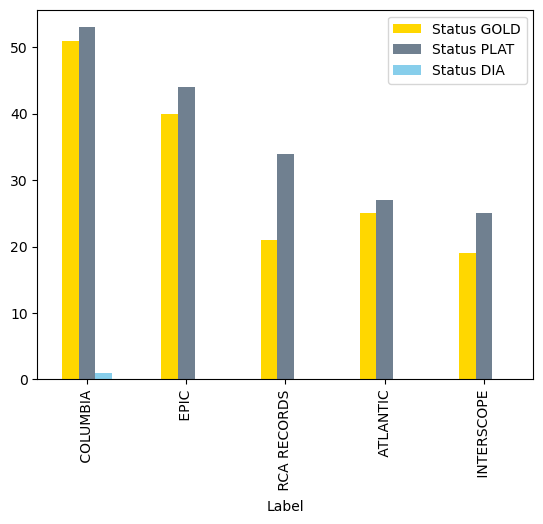

In [82]:
# # display multi-bar graph...breakdown of certs by label
# test_df=all_certs_df.reset_index()
# # colors = ['Gold','Slategray', 'Skyblue']
# label_group_df=test_df.groupby('Label')[['Status GOLD', 'Status PLAT', 'Status DIA']].count()
# label_group_df['Total']=label_group_df.sum(axis=1)

# # change sort values as needed
# label_group_df=label_group_df.sort_values('Total', ascending=False)
# label_group_df.head()[['Status GOLD', 'Status PLAT', 'Status DIA']].plot(kind='bar', colors=['Gold', 'Slategray', 'Skyblue'])

test_df = all_certs_df.reset_index()
colors = ['Gold', 'Slategray', 'Skyblue']
label_group_df = test_df.groupby('Label')[['Status GOLD', 'Status PLAT', 'Status DIA']].count()
label_group_df['Total'] = label_group_df.sum(axis=1)
label_group_df = label_group_df.sort_values('Total', ascending=False)
label_group_df.head()[['Status GOLD', 'Status PLAT', 'Status DIA']].plot(kind='bar', color=colors)

<AxesSubplot:xlabel='Label'>

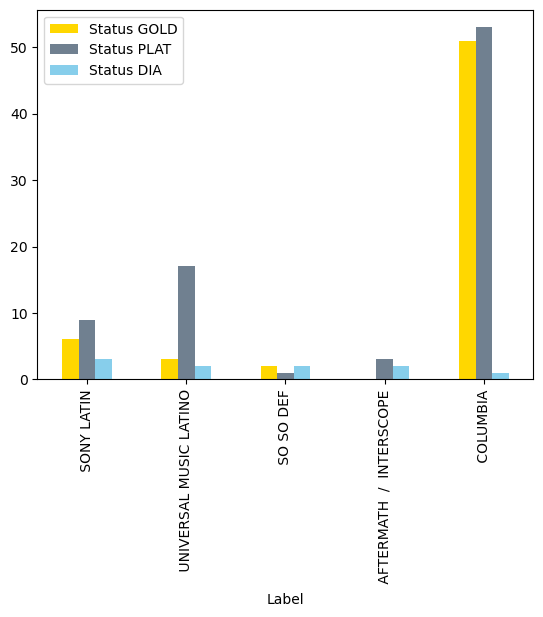

In [83]:
# display multi-bar graph...breakdown of certs by label
test_df=all_certs_df.reset_index()
colors = ['Gold', 'Slategray', 'Skyblue']

label_group_df=test_df.groupby('Label')[['Status GOLD', 'Status PLAT', 'Status DIA']].count()
label_group_df['Total']=label_group_df.sum(axis=1)

# change sort values as needed
label_group_df=label_group_df.sort_values('Status DIA', ascending=False)
label_group_df.head()[['Status GOLD', 'Status PLAT', 'Status DIA']].plot(kind='bar', color=colors)